In [15]:
from datasets import load_dataset, IterableDataset
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [14]:
ds = load_dataset("ILSVRC/imagenet-1k", split="train", streaming=True)

# Load first N samples of ImageNet-1k 
N = 10000
samples_iter = ds.take(N)._ex_iterable
dataset = IterableDataset(ex_iterable=samples_iter, info=ds.info, split=ds.split)
samples = list(samples_iter)

print(f"Loaded {len(samples)} samples")
print("First sample:", samples[0])

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loaded 10000 samples
First sample: ('0_0', {'image': {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x90\x00\x90\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x03\x04\x05\x04\x04\x05\x06\n\x07\x06\x06\x06\x06\r\t\n\x08\n\x0f\r\x10\x10\x0f\r\x0f\x0e\x11\x13\x18\x14\x11\x12\x17\x12\x0e\x0f\x15\x1c\x15\x17\x19\x19\x1b\x1b\x1b\x10\x14\x1d\x1f\x1d\x1a\x1f\x18\x1a\x1b\x1a\xff\xdb\x00C\x01\x04\x05\x05\x06\x05\x06\x0c\x07\x07\x0c\x1a\x11\x0f\x11\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\x1a\xff\xc0\x00\x11\x08\x01k\x031\x03\x01!\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\x07\x08\t\xff\xc4\x00D\x10\x00\x01\x03\x03\x03\x02\x04\x05\x02\x04\x05\x02\x05\x04\x01\x05\x01\x00\x02\x11\x03\x04!\x05\x121AQ\x06\x13aq\x07"\x81\x91\xa1\x

In [16]:
label_lookup_table = dataset.features["label"].names 
labels = [sample["label"] for sample in dataset]
label_names = [label_lookup_table[l] for l in labels]
images = [sample["image"] for sample in dataset]
unique_labels = list(set(labels))

print("Number of unique labels in dataset:", len(unique_labels))
print("Number of labels overall:", len(label_lookup_table))

Number of unique labels in dataset: 1000
Number of labels overall: 1000


Average samples per class: 10.00
Standard deviation: 3.07


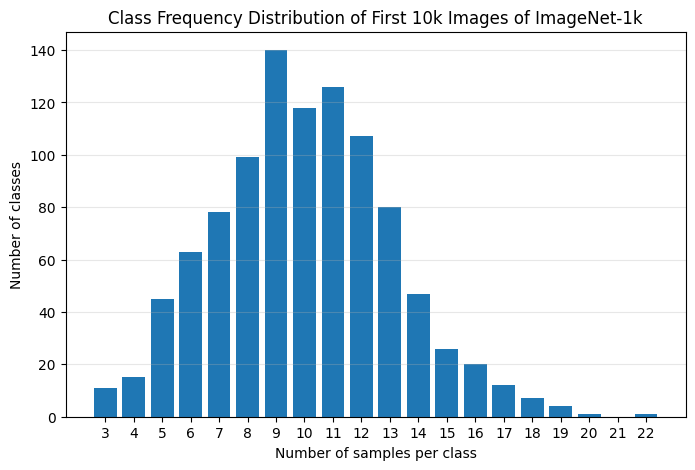

In [17]:
# Class frequency distribution
class_counts = Counter(label_names)
freq_dist = Counter(class_counts.values())
sorted_freqs = dict(sorted(freq_dist.items()))

# Average number of samples per class
counts = np.array(list(class_counts.values()))
mean_samples = np.mean(counts)
std_samples = np.std(counts)
print(f"Average samples per class: {mean_samples:.2f}")
print(f"Standard deviation: {std_samples:.2f}")

plt.figure(figsize=(8, 5))
plt.bar(sorted_freqs.keys(), sorted_freqs.values(), width=0.8)
plt.xlabel("Number of samples per class")
plt.ylabel("Number of classes")
plt.title("Class Frequency Distribution of First 10k Images of ImageNet-1k")
plt.grid(axis="y", alpha=0.3)
xmin, xmax = min(sorted_freqs.keys()), max(sorted_freqs.keys())
plt.xticks(range(xmin, xmax + 1, 1))
plt.show()


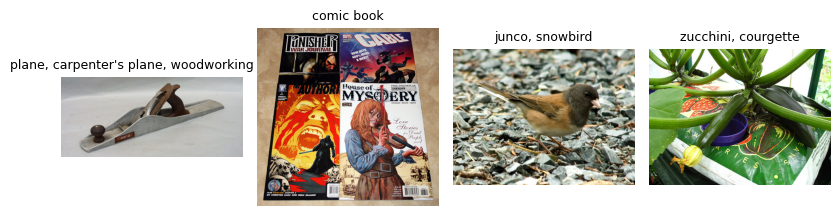

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(8, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis("off")
    ax.set_title(label_names[i], fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
k = 5
top_k = class_counts.most_common(k)
print(f"Top {k} most frequent classes:")
for class_name, freq in top_k:
    print(f"{class_name}: {freq}")

bottom_k = sorted(class_counts.items(), key=lambda x: x[1])[:k]
print(f"\nBottom {k} least frequent classes:")
for class_name, freq in bottom_k:
    print(f"{class_name}: {freq}")


Top 5 most frequent classes:
green snake, grass snake: 22
skunk, polecat, wood pussy: 20
hoopskirt, crinoline: 19
miniature pinscher: 19
burrito: 19

Bottom 5 least frequent classes:
barbershop: 3
power drill: 3
Mexican hairless: 3
sorrel: 3
Pembroke, Pembroke Welsh corgi: 3


In [20]:
widths = []
heights = []

for img in images:
    widths.append(img.width)
    heights.append(img.height)
widths = np.array(widths)
heights = np.array(heights)
avg_width = np.mean(widths)
avg_height = np.mean(heights)
std_width = np.std(widths, ddof=1)
std_height = np.std(heights, ddof=1)

print(f"Average width: {avg_width:.1f}, average height: {avg_height:.1f}")
print(f"Width std: {std_width:.1f}, height std: {std_height:.1f}")


Average width: 473.2, average height: 406.8
Width std: 201.6, height std: 174.9
